# Common utilities

Module [majordome.common](../modules/common.md) provides a set of utilities that are whether too general purpose for integrating another module or still waiting to find their definitive home. These include constants, type aliases, and functionalities of different kinds. Regarding this last kind of components, this tutorial aims at illustrating their use for practical documentation.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from majordome import (
    Constants,
    RelaxUpdate,
    StabilizeNvarsConvergenceCheck,
    standard_plot,
)
import numpy as np

## *Constants*

Singleton class for storing real constants.

In [3]:
Constants() is Constants()

True

In [4]:
print(Constants.report())

|-------------|--------------------------------------------|------|--------------|
| GRAVITY     | Conventional gravity acceleration on Earth | m/s² |      9.80665 |
| T_REFERENCE | Thermodynamic reference temperature        | K    |    298.15    |
| T_NORMAL    | Normal state reference temperature         | K    |    273.15    |
| P_NORMAL    | Normal state reference pressure            | Pa   | 101325       |


## *ReadTextData*

WIP, sorry for the inconvenience...

## *StandardPlot*

WIP, sorry for the inconvenience...

## *InteractiveSession*

WIP, sorry for the inconvenience...

## *RelaxUpdate* and *StabilizeNvarsConvergenceCheck*

Simplest of relaxation methods; assume you have a new updated solution $A_{new}^{\star}$ for a problem whose past state was $A_{old}$, then the manager will ensure the following relaxation will be applied to compute the next solution state $A_{new}$ to be used in whatever you are computing:

$$
\begin{align}
A_{new} &= \alpha{}A_{old} + (1-\alpha)A_{new}^{\star}\\
A_{old} &= A_{new}
\end{align}
$$

Notice that in this formulation, $\alpha$ (or `alpha` in the API) represents the fraction of old solution to be used in the *smearing* process. Below we illustrate the effect of a step function $H$ valued at `10` from the begining over consecutive updates (here we do not test for convergence, as that is problem specific and for this simple case the required number of steps could be evaluated by hand, take some time to try!).

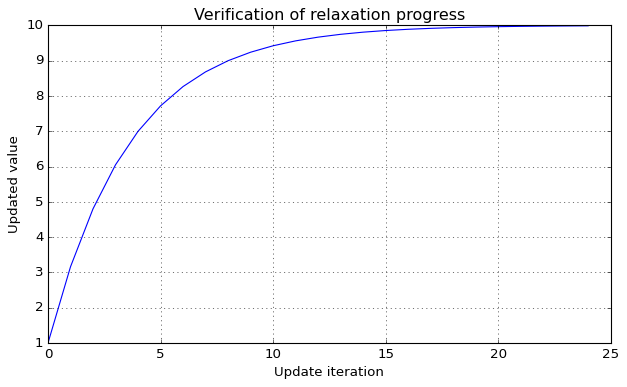

In [5]:
alpha = 0.76
niter = 50

single = np.ones(1)
relaxer = RelaxUpdate(single, alpha)

opts = dict(n_vars=1, max_iter=niter, patience=3, rtol=0.001)
converged = StabilizeNvarsConvergenceCheck(**opts)

history = np.zeros(niter+1)
history[0] = single[0]

H = np.asarray([10])

for n in range(niter):
    single[:] = relaxer(H)
    history[n+1] = single[0]

    if converged(single[0]):
        history = history[:n+2]
        break

@standard_plot(resized=(8, 5))
def plot_history(history, fig, ax):
    ax[0].plot(history)
    ax[0].set_title("Verification of relaxation progress")
    ax[0].set_xlabel("Update iteration")
    ax[0].set_ylabel("Updated value")

_ = plot_history(history)